# <font color='darkblue'>Pegando Dados do Banco Central com Python

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

https://wilsonfreitas.github.io/python-bcb/sgs.html

### <font color='darkblue'> Documentação Mplcyberpunk, Matplotlib, Python-bcb
https://pypi.org/project/mplcyberpunk/

https://matplotlib.org/stable/index.html
    
https://pypi.org/project/python-bcb/

### <font color='darkblue'>Link da Aula, Para Acompanhamento
https://www.youtube.com/watch?v=KKMNdqfzsTI&list=PLQkgHGk8rux6L42KC9l6R25AD7iimkLi_&index=12

In [60]:
# Instalar as bibliotecas abaixo:
# !pip install mplcyberpunk
# !pip install matplotlib
# !pip install python-bcb
# Para olhar se a biblioteca já está instalada, deve-se ir no Prompet do Anaconda e digitar: pip freeze

In [7]:
# Importar as bibliotecas

# Essa biblioteca foi baseada no Matplotlib e faz gráficos Cyberpunk no Python.
import mplcyberpunk

# Essa biblioteca permite acesso ao dados do Banco Central.
from bcb import sgs
from bcb import currency

# Matplotlib é uma biblioteca Python frequentemente utilizada para ciência de dados. É uma ferramenta de código aberto
# que oferece recursos de plotagem para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas.
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num

# Essa biblioteca efetua manipulação de séries no tempo para data frame.
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

### <font color='darkblue'>Taxa de Juros

In [8]:
# Vamos importar a série (Selic) do Banco Centra
# Vamos utilizar "from bcb import sgs"
# Para saber qual o códico da série que queremos importa devemos olhar na página do BC (Link Acima e Descrição Abaixo)
# https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

selic = sgs.get({'selic':432}, start = '2010-01-01') 

selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2023-09-24,12.75
2023-09-25,12.75
2023-09-26,12.75


### <font color='darkblue'> Gráfico da Taxa de Juros - Selic

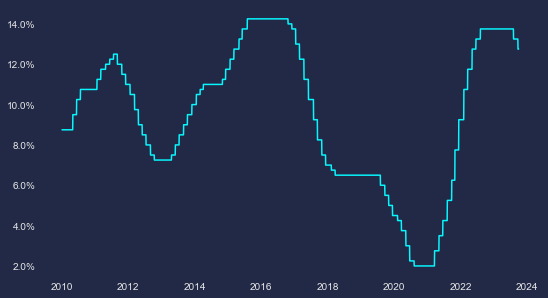

In [15]:
# Vamos plotar um gráfico usando o matplotlib;
# Vamos definir o tamanho do gráfico: fig, ax = plt.subplots(figsize=(9, 5))
# Vamos tirar as linhas do fundo do gráfico: "ax.grid(False)"
# Depois vamos salvar o gráfico em nossa pasta, "plt.savefig('selic.png', dpi = 300)"

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Defina o tamanho da figura aqui (largura x altura em polegadas)
fig, ax = plt.subplots(figsize=(9, 5))

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('Selic.png', dpi=300)

plt.show()

### <font color='darkblue'>Inflação

In [10]:
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days = 366)

In [11]:
# Vamos importar a série (IPCA e IGP-M) do Banco Centra
# Vamos utilizar "from bcb import sgs"
# Para saber qual o códico da série que queremos importa devemos olhar na página do BC (Link Acima e Descrição Abaixo)
# https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

inflacao = sgs.get({'ipca': 433,
             'igp-m': 189}, start = um_ano_atras + timedelta(100))

inflacao

,ipca,igp-m
Date,,
2023-01-01,0.53,0.21
2023-02-01,0.84,-0.06
2023-03-01,0.71,0.05
2023-04-01,0.61,-0.95
2023-05-01,0.23,-1.84
2023-06-01,-0.08,-1.93
2023-07-01,0.12,-0.72
2023-08-01,0.23,-0.14
2023-09-01,NaN,0.37


### <font color='darkblue'> Gráfico da Inflação: (IPCA/IGP-M)

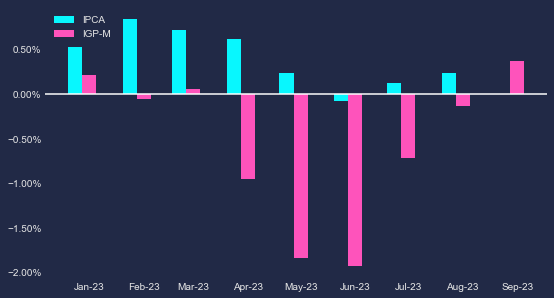

In [16]:
# Vamos plotar o gráfico do IPCA e IGPM usando o (matplotlib)
# Vamos definir o tamanho do gráfico: fig, ax = plt.subplots(figsize=(9, 5))
# Vamos tirar as linhas do fundo do gráfico: "ax.grid(False"
# Vamos abilitar a legenta: "plt.legend()"
# Depois vamos salvar o gráfico em nossa pasta, "plt.savefig('selic.png', dpi = 300)"

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.dates import date2num

# Suponha que 'inflacao' seja um DataFrame com os dados apropriados
datas_numericas = date2num(inflacao.index)

# Defina o tamanho da figura aqui (largura x altura em polegadas)
fig, ax = plt.subplots(figsize=(9, 5))

ax.bar(datas_numericas - 8, inflacao['ipca'], label="IPCA", width=8)
ax.bar(datas_numericas, inflacao['igp-m'], label="IGP-M", width=8)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color='w')
plt.legend()
plt.savefig('Inflacao.png', dpi=300)

plt.show()

### <font color='darkblue'> Câmbio

In [13]:
# Vamos importar a série (Câmbio) do Banco Centra, nesse caso escolhemos "USD e "EUR"
# Vamos utilizar "from bcb import currency"
# Para saber qual o códico da série que queremos importa devemos olhar na página do BC (Link Acima e Descrição Abaixo)
# https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

df = currency.get(['EUR', 'USD',],
                  start='2000-01-01',
                  end='2023-03-10',
                  side='ask')
df

,EUR,USD
Date,,
2000-01-03,1.85047,1.8011
2000-01-04,1.89150,1.8337
2000-01-05,1.91582,1.8544
2000-01-06,1.90761,1.8461
2000-01-07,1.88241,1.8281
...,...,...
2023-03-06,5.55090,5.1970
2023-03-07,5.49480,5.1901
2023-03-08,5.42440,5.1387


### <font color='darkblue'> Gráfico do Câmbio: (EUR/USD)

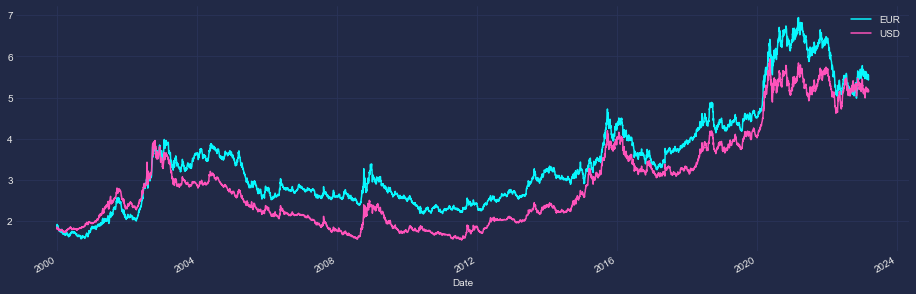

In [17]:
# Vamos plotar o gráfico do EUR e USD usando o (matplotlib)
# Vamos definir o tamanho do gráfico: df.plot(figsize=(16, 5))
# Depois vamos salvar o gráfico em nossa pasta, "plt.savefig('selic.png', dpi = 300)"

df.plot(figsize=(16, 5))
plt.savefig('Câmbio EUR e USD.png', dpi=300) 

###### <font color='Red'> Projeto (28/09/2023): Importção de dados do Banco Central do Brasil - William E. Santos. 